In [1]:
run __init__.py

In [2]:
import plotly.express as px
import pandas as pd

import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
# import plotly.graph_objs as go
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate
import dash_bootstrap_components as dbc
# import plotly.graph_objects as go

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
init_notebook_mode(connected=True)

In [13]:
from datetime_util import datetime2str, timestamp2datetime
from finnhub_api import FinnHub_init, Finnhub
from datetime import datetime, timedelta
from joblib import load, dump

In [25]:
import plotly.express as px

In [125]:
def live_update_price(symbol):
    finnhub_key = load('./finnhub/finnhub_key.pkl', 'rb')
    start_date = datetime2str(datetime.now() - timedelta(minutes=60))
    end_date = datetime2str(datetime.now())
    symbol = symbol
    
    print(start_date)
    print(end_date)
    finhub_inst = Finnhub(finnhub_key, start_date, end_date, symbol)
    df = finhub_inst.stock_candles("1")
    df['date'] = df['date'].apply(lambda x: timestamp2datetime(x))
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
    return df

In [126]:
df2 = live_update_price("AAPL")

2021-06-14 17:21:01
2021-06-14 18:21:01


In [22]:
df1 = live_update_price("AAPL")

In [127]:
df2['date'].max()

Timestamp('2021-06-14 18:20:00')

In [104]:
df1.filter("open=='130.48'", axis=0)

,close,high,low,open,status,date,volume


In [128]:
df2.tail()

,close,high,low,open,status,date,volume
45,130.28,130.28,130.28,130.28,ok,2021-06-14 18:15:00,405
46,130.26,130.27,130.26,130.27,ok,2021-06-14 18:16:00,1018
47,130.27,130.27,130.27,130.27,ok,2021-06-14 18:18:00,99
48,130.26,130.26,130.26,130.26,ok,2021-06-14 18:19:00,165
49,130.27,130.27,130.22,130.25,ok,2021-06-14 18:20:00,2232


In [124]:
df1.iloc[-1:]

,close,high,low,open,status,date,volume
57,130.39,130.48,130.39,130.48,ok,2021-06-14 16:57:00,319188


In [113]:
df1.query("date=='2021-06-14 16:57:00'")

,close,high,low,open,status,date,volume
57,130.39,130.48,130.39,130.48,ok,2021-06-14 16:57:00,319188


In [93]:
df1.loc[df1['date']==df1['date'].max()]

,close,high,low,open,status,date,volume
57,130.39,130.48,130.39,130.48,ok,2021-06-14 16:57:00,319188


In [84]:
df1.tail()

,close,high,low,open,status,date,volume
53,130.40,130.4000,130.38,130.4000,ok,2021-06-14 16:53:00,1384
54,130.38,130.3901,130.38,130.3901,ok,2021-06-14 16:54:00,1371
55,130.40,130.4100,130.40,130.4100,ok,2021-06-14 16:55:00,563
56,130.38,130.4100,130.38,130.4100,ok,2021-06-14 16:56:00,1475888
57,130.39,130.4800,130.39,130.4800,ok,2021-06-14 16:57:00,319188


In [68]:
def plot_price():
    fig = px.line(df1, x='date',y=['open' ,'close'])
    fig.update_layout(
                    height=400,
                    width=700,
                    margin={"r":0,"t":50,"l":0,"b":0},
                    paper_bgcolor='white',
                    title='Apple Price',
            xaxis=dict(
                    title='Date & Time',
                    linecolor='black',
                    titlefont_size=10,
                    tickfont_size=10,
                    showgrid=False
                    ),
            yaxis=dict(
                    title='Stock Price',
                    linecolor='black',
                    titlefont_size=10,
                    tickfont_size=10,
                    showgrid=False
                    ),
            legend=dict(
                    title='Prices',
                    x=1,
                    y=1,
                    bgcolor='rgba(255, 255, 255, 0)',
                    bordercolor='rgba(255, 255, 255, 0)'
                    )
                            )
    return fig

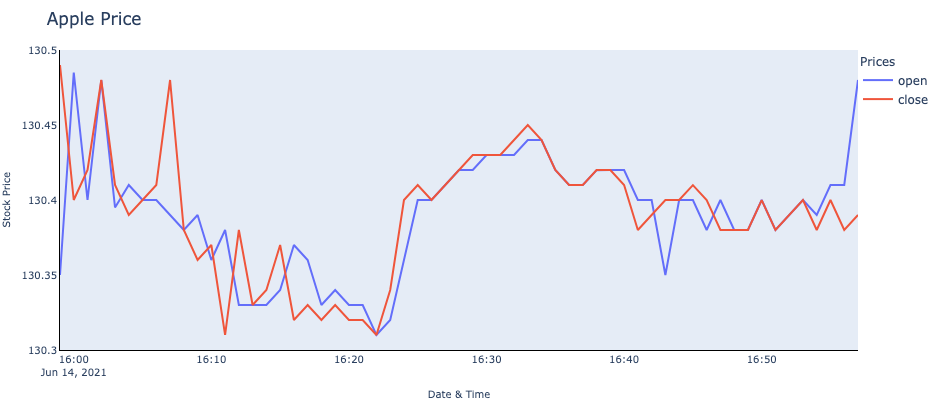

In [69]:
plot_price()

In [2]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.SANDSTONE])

In [3]:
app.title = "Stock Market Sentiment Analysis"

In [ ]:
dbc.NavbarSimple()

In [11]:
dcc.Graph(id='')

In [19]:
df=pd.read_csv('./data/stocknews_01jun21-07jun21.csv')

In [20]:
tick=pd.read_csv('./data/apple_5m.csv')

In [21]:
df.head(1)

,news_url,image_url,title,text,source_name,date,topics,sentiment,type,tickers
0,https://www.cnbc.com/2021/06/07/apple-is-turni...,https://cdn.snapi.dev/images/v1/0/i/106893386-...,Apple is turning privacy into a business advan...,Privacy was mentioned as part of nearly every ...,CNBC,"Mon, 07 Jun 2021 18:52:59 -0400",[],Positive,Article,['AAPL']


In [ ]:
dbc.NavLink()